# Visualize and Analyze the data

In [1]:
import os
os.chdir('../saliency_model/')

import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
(summary, context, model) = pickle.load(open( "19-01-31_results.p", "rb"))

In [3]:
nss_table = summary[:,:,0]
print(np.shape(nss_table))
sim_table = summary[:,:,1]
ig_table = summary[:,:,2]
auc_table = summary[:,:,3]

(5, 15)


In [4]:
nss_table


array([[0.69737115, 0.75077319, 0.6989846 , 0.74825823, 0.81202544,
        0.87121402, 1.000758  , 0.92782077, 0.97058922, 0.7553367 ,
        0.79457351, 0.60909373, 0.67202676, 0.38464215, 0.4655079 ],
       [0.75055505, 0.84020208, 0.74521462, 0.83026827, 0.85914635,
        0.95495645, 1.07557812, 0.97326072, 1.04380897, 0.80470011,
        0.86845859, 0.65624826, 0.75836754, 0.3758054 , 0.5119159 ],
       [0.64599774, 0.6554315 , 0.60408286, 0.62054998, 0.79767594,
        0.82697405, 1.05201473, 0.87083486, 0.8878822 , 0.71115711,
        0.72751949, 0.57022169, 0.59353869, 0.23257082, 0.26381346],
       [0.61742668, 0.7000499 , 0.60891755, 0.68281178, 0.66754221,
        0.77209193, 0.86978811, 0.82039151, 0.87657261, 0.69069135,
        0.73468026, 0.54826447, 0.64629925, 0.35003626, 0.47020527],
       [0.90052985, 0.94572395, 0.90400148, 0.94437037, 1.00412839,
        1.03869553, 1.15040448, 1.14361731, 1.19347188, 0.83992446,
        0.86389113, 0.82551936, 0.85940659, 

In [5]:
context

['none', 'person', 'animal', 'electronic', 'sports']

In [6]:
model

['aim',
 'aim_face',
 'cas',
 'cas_face',
 'covsal',
 'covsal_face',
 'dg',
 'gbvs',
 'gbvs_face',
 'icf',
 'icf_face',
 'ik_10',
 'ik_10_face',
 'sun',
 'sun_face']

## NSS: Set up plots for each model

In [7]:
df_nss = pd.DataFrame(data=nss_table, columns=model, index=context)
df_nss.columns.name='models'
df_nss.index.name='context'

In [8]:
df_nss

models,aim,aim_face,cas,cas_face,covsal,covsal_face,dg,gbvs,gbvs_face,icf,icf_face,ik_10,ik_10_face,sun,sun_face
context,,,,,,,,,,,,,,,
none,0.697371,0.750773,0.698985,0.748258,0.812025,0.871214,1.000758,0.927821,0.970589,0.755337,0.794574,0.609094,0.672027,0.384642,0.465508
person,0.750555,0.840202,0.745215,0.830268,0.859146,0.954956,1.075578,0.973261,1.043809,0.804700,0.868459,0.656248,0.758368,0.375805,0.511916
animal,0.645998,0.655431,0.604083,0.620550,0.797676,0.826974,1.052015,0.870835,0.887882,0.711157,0.727519,0.570222,0.593539,0.232571,0.263813
electronic,0.617427,0.700050,0.608918,0.682812,0.667542,0.772092,0.869788,0.820392,0.876573,0.690691,0.734680,0.548264,0.646299,0.350036,0.470205
sports,0.900530,0.945724,0.904001,0.944370,1.004128,1.038696,1.150404,1.143617,1.193472,0.839924,0.863891,0.825519,0.859407,0.380984,0.451053


In [9]:
NSS = df_nss.transpose()

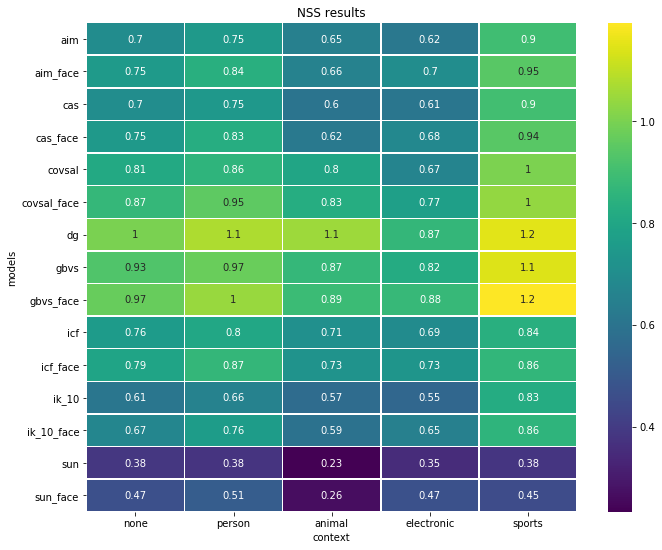

In [10]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax, cmap='viridis');
plt.title('NSS results');
plt.savefig('NSS_all.jpg', bbox_inches='tight', pad_inches=0)

In [11]:
# f, ax = plt.subplots(figsize=(11, 9))
# sns.heatmap(NSS, annot=True, linewidths=.5, ax=ax);
# plt.title('NSS results');
# plt.savefig('NSS2.jpg')

## NSS: Separate plots for face and no face

In [12]:
NSS_no_face = NSS.loc[('aim', 'cas', 'covsal', 'dg', 'gbvs', 'icf', 'ik_10', 'sun'),:]
NSS_face = NSS.loc[('aim_face', 'cas_face', 'covsal_face', 'dg', 'gbvs_face', 'icf_face', 'ik_10_face', 'sun_face'),:]

In [13]:
# f, ax = plt.subplots(1,2, figsize=(15, 7))
# sns.heatmap(NSS_no_face, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=None );
# ax[0].set_title('NSS no face feature');
# sns.heatmap(NSS_face, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=None);
# ax[1].set_title('NSS with face feature');

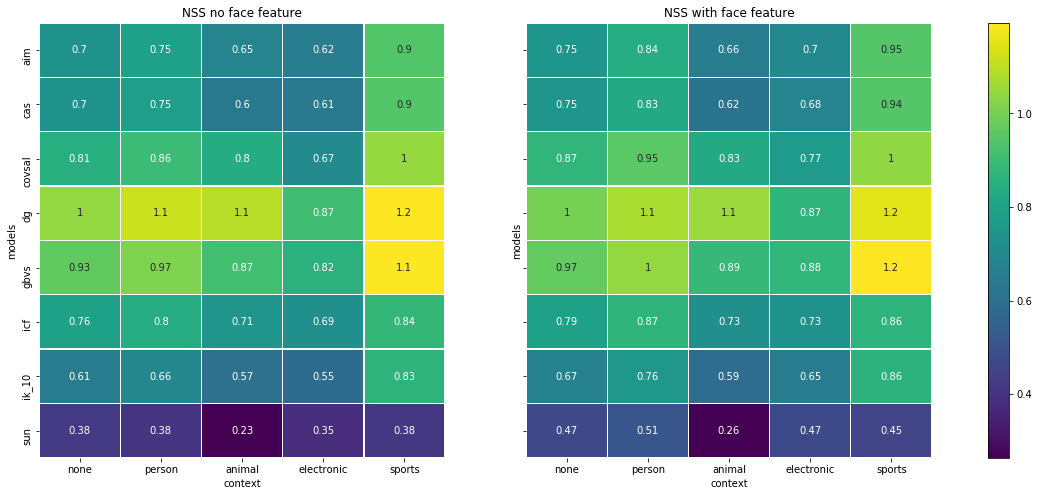

In [14]:
fig, ax = plt.subplots(1, 2,figsize=(20,8), sharex=True, sharey=True)

im = sns.heatmap(NSS_face, annot=True, linewidths=.5, ax=ax[1], cmap='viridis', cbar=False);
sns.heatmap(NSS_no_face, annot=True, linewidths=.5, ax=ax[0], cmap='viridis', cbar=False);

mappable = im.get_children()[0]
# plt.colorbar(mappable, ax = ax,orientation = 'horizontal')
plt.colorbar(mappable, ax = ax);

ax[0].set_title('NSS no face feature');
ax[1].set_title('NSS with face feature');
plt.savefig('nss_sep.jpg', bbox_inches='tight', pad_inches=0)

## Plot Difference The Relative Error

In [15]:
NSS_no_face = NSS.loc[('aim', 'cas', 'covsal', 'gbvs', 'icf', 'ik_10', 'sun'),:]
NSS_face = NSS.loc[('aim_face', 'cas_face', 'covsal_face', 'gbvs_face', 'icf_face', 'ik_10_face', 'sun_face'),:]

In [16]:
# Rename columns of the face plot
col = {'aim_face':'aim', 'cas_face':'cas', 'covsal_face':'covsal', 'gbvs_face':'gbvs', 'icf_face':'icf', 'ik_10_face':'ik_10', 'sun_face':'sun'}
NSS_face_new_keys = NSS_face.transpose().rename(index=str, columns=col).transpose()

In [17]:
# Calculate the relative error
NSS_diff = ((NSS_face_new_keys - NSS_no_face) / NSS_no_face)*100

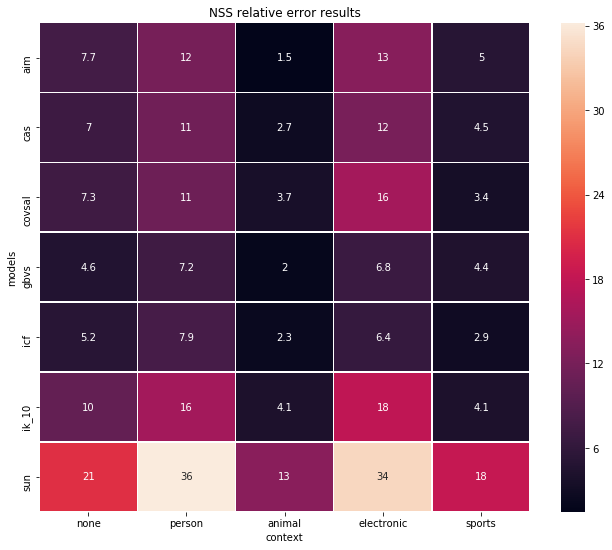

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(NSS_diff, annot=True, linewidths=.5, ax=ax);
plt.title('NSS relative error results');
plt.savefig('nss_diff.jpg', bbox_inches='tight', pad_inches=0)

In [19]:
sns.set_style("whitegrid")

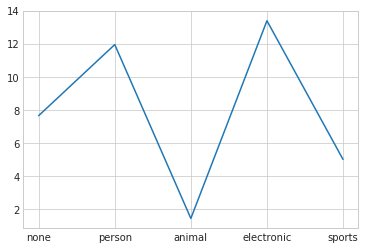

In [20]:
aim_nss = NSS_diff.transpose()['aim']
plt.plot(aim_nss);


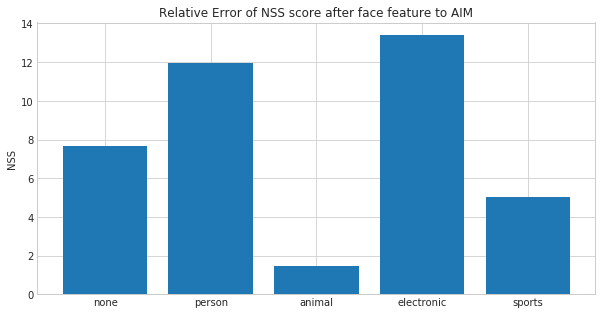

In [21]:
plt.subplots(1,1,figsize=(10,5))
plt.bar(aim_nss.index, aim_nss.values);
plt.title('Relative Error of NSS score after face feature to AIM');
plt.ylabel('NSS')
plt.savefig('nss_aim_relerr.jpg', bbox_inches='tight', pad_inches=0)